## Анализ и прогнозирование временных рядов методами искусственного интеллекта

### **Практическая работа 7. Восстановление пропусков и прогноз значений временного ряда.**


#### **7.1 Аналитечкие методы востановления временного ряда**

##### *Краткое описание*

В данном пункте практической работы вам предстоит познакомиться с базовыми, аналитическими методами восстановления временных рядов.
Для выполнения данного пункта из каждой группы методов, представленных в ***табл. 7.1*** вам необходимо выбрать по одному методу восстановления ряда. При работе с первой группой, вам необходимо самостоятельно реализовать выбранный метод.  

**Табл. 7.1** - Группы аналитических методов восстановления.
№|Название группы|Модели и методы|
--|----|----|
1|Заполнение существующими значениями ряда|Средним, медианной, Hot-Deck|
2|Заполнение на основе близки значений|[Интерполяция](https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html),  [KNNi](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html)|
3|На основе матричных разложений|[CD-Rec](#Fixme:Дат ссылку), [SVD](https://pypi.org/project/fancyimpute/)|

##### 7.1.1 Загрузка и подготовка данных

In [164]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [166]:
path_data = Path('datasets')/'madrid.txt'
madrid = np.loadtxt(path_data)[:,0]
print(madrid.shape)

(25000,)


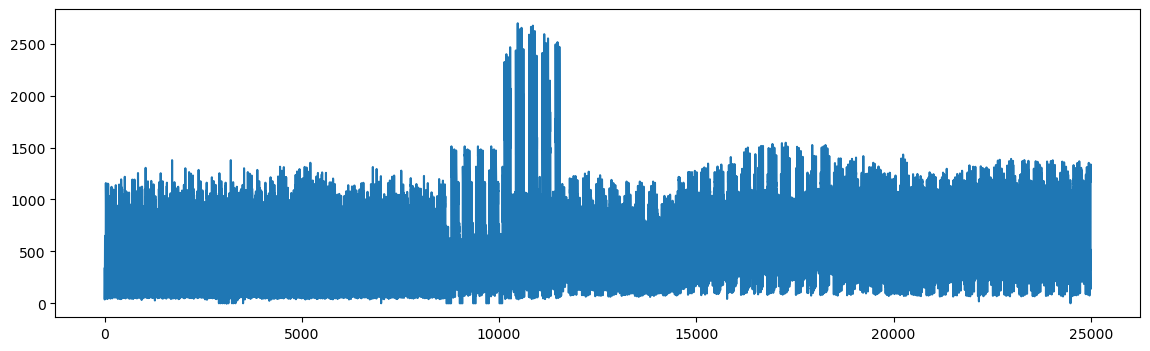

In [168]:
fig, ax =  plt.subplots(figsize=(14,4),ncols=1,nrows=1)
plt.plot(madrid[:])
plt.show()

Самостоятельно реализуйте функцию, принимающую на вход многомерный временной ряд и возвращающий:
1. Все подпоследовательности временного ряда, в которых некоторые значения временного ряда были заменены nan значениями.
2. Индексы пропущенных значений
   
Процент пропущенных значений должен регулироваться отдельным параметром.


In [171]:
import copy
import random

random.seed(0)

In [173]:
def add_nan(x, percent = 0.25):
    x_with_nan = copy.deepcopy(x)
    nan_len = x.shape[0] * percent
    nan_counter = 0
    x_with_nan_index = []

    for i in range(x_with_nan.shape[0]):
        if nan_counter <= nan_len and random.randint(0, 1):
            x_with_nan[i] = np.nan
            nan_counter += 1

    return x_with_nan, np.isnan(x_with_nan)

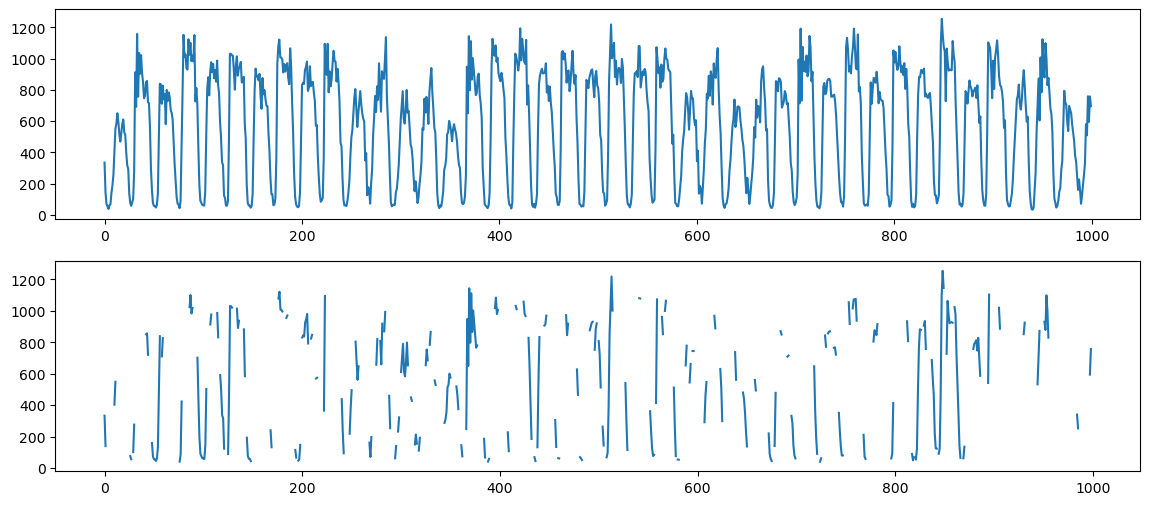

In [187]:
madrid_with_nan, index = add_nan(madrid)
fig, ax =  plt.subplots(figsize=(14,6),ncols=1,nrows=2)
ax[0].plot(madrid[:1000])
ax[1].plot(madrid_with_nan[:1000])
plt.show()

##### 7.1.2 Заполнение существующими значениями ряда


In [140]:
recovery = {}

In [142]:
#Заполнением методом средних по всем оставшимся значениям.
madrid_mean = madrid_with_nan.copy()
madrid_mean[index] = np.nanmean(madrid_mean)
recovery['mean'] = madrid_mean

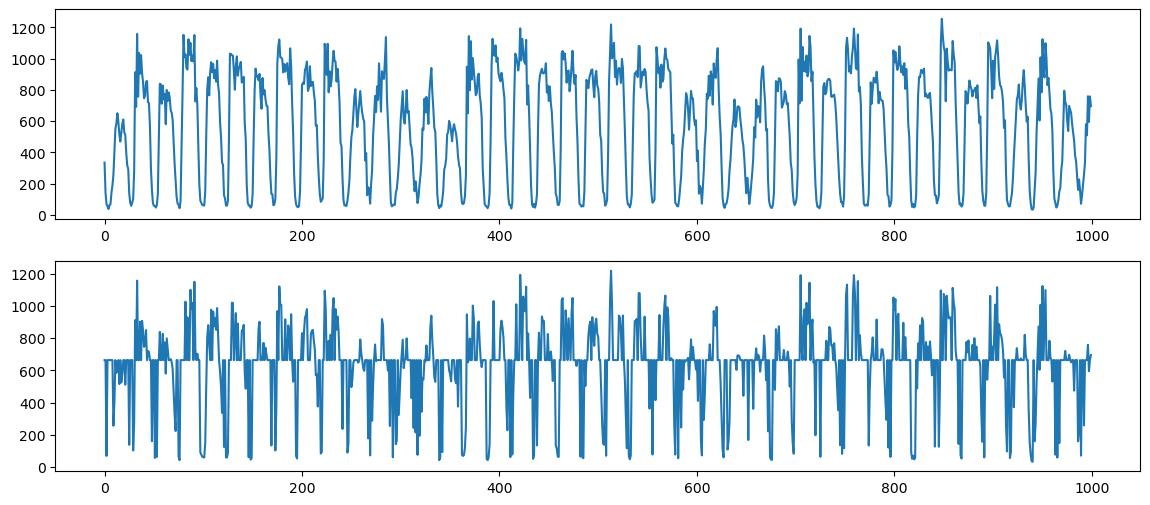

In [144]:
fig, ax =  plt.subplots(figsize=(14,6),ncols=1,nrows=2)
ax[0].plot(madrid[:1000])
ax[1].plot(madrid_mean[:1000])
plt.show()

In [146]:
#Заполнением методом Медианойпо всем оставшимся значениям.
madrid_median = madrid_with_nan.copy()
madrid_median[index] = np.nanmedian(madrid_median)

In [148]:
recovery['median'] = madrid_median

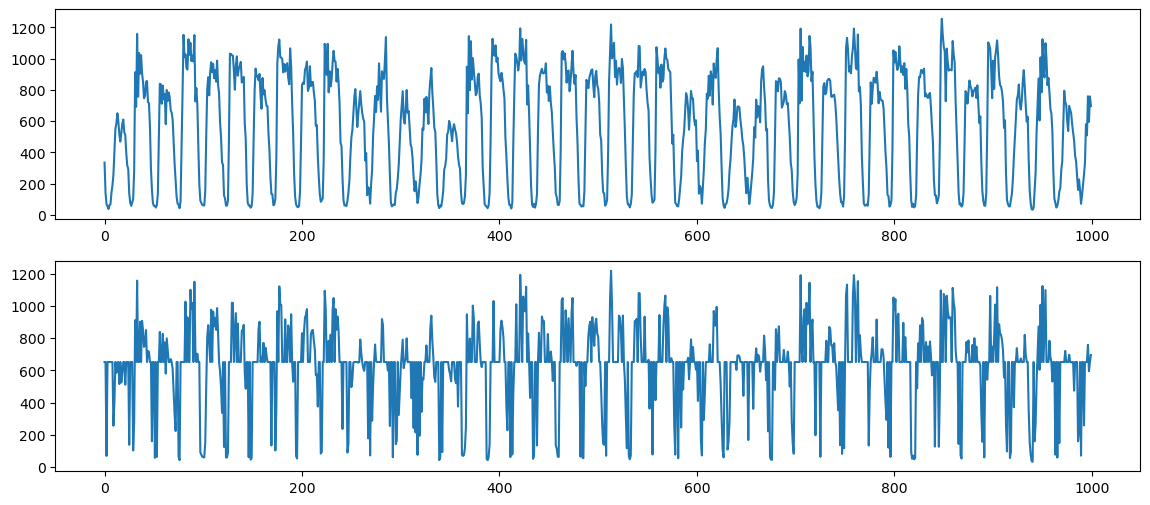

In [150]:
madrid_with_nan, index = add_nan(madrid)
fig, ax =  plt.subplots(figsize=(14,6),ncols=1,nrows=2)
ax[0].plot(madrid[:1000])
ax[1].plot(madrid_median[:1000])
plt.show()

Самостоятельно реализуйте один метод из первой группы ***табл. 7.1*** и проведите постановление данных, сохранив результаты восстановления.

In [152]:
madrid_with_nan.shape

(25000,)

In [154]:
# меняем на двумерный массив, который пригоден для работы с функцией и обработки пропусков по индексам.
madrid_with_nan = madrid_with_nan.reshape(-1, 1)
madrid_with_nan.shape

(25000, 1)

In [156]:
# Hot-Deck

def get_not_nan_row(index, i_indx, x, x_indx, step):

    # index - массив индексов
    # i_indx - индекс строки массива индексов, для заполнения которой ищем значения
    # x - массив значений
    # x_indx - индекс строки массива значений, в которой ищем значения
    # step - шаг

    if x.shape[0] <= x_indx and x_indx >= 0:
        return np.nan

    if ~np.isnan(x[x_indx][index[i_indx]]).all():
        return x[x_indx][index[i_indx]]

    return np.nan


def hot_deck(x, index):
    hot_deck = x.copy()

    for i in range(x.shape[0]):
        if index[i].any():

            for j in range(i, x.shape[0]):
                if ~np.isnan(hot_deck[j][index[i]]).any():
                    next_row = hot_deck[j][index[i]]
                    break

            if ~np.isnan(next_row).any():
                hot_deck[i][index[i]] = next_row
            else:
                for j in range(i, 0, -1):
                    if ~np.isnan(hot_deck[j][index[1]]).any():
                        prev_row = hot_deck[j][index[i]]
                        break

                if ~np.isnan(prev_row).any():
                    hot_deck[i][index[i]] = prev_row

    return hot_deck

In [158]:
madrid_hot_deck = hot_deck(madrid_with_nan, index)

In [160]:
recovery['hot_deck'] = madrid_hot_deck

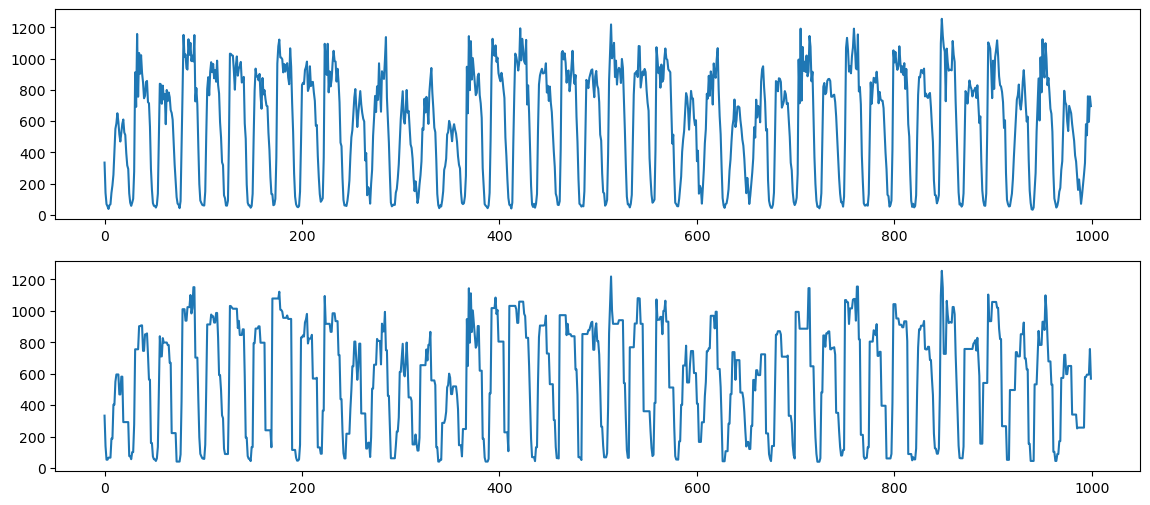

In [162]:
fig, ax =  plt.subplots(figsize=(14,6),ncols=1,nrows=2)
ax[0].plot(madrid[:1000])
ax[1].plot(madrid_hot_deck[:1000])
plt.show()

##### 7.1.3 Заполнение на основе близких значений


Используя документацию одного из методов восстановления второй группы ***табл. 7.1*** и проведите восстановление данных, сохранив результаты восстановления.

In [177]:
from sklearn.impute import KNNImputer

In [179]:
def rolling_window(a, window, intersection=False):
    # result = torch.zeros(size=(a.shape[0],a.shape[1]))
    returns = []
    if intersection:  
        for i in range(0, a.shape[0]-window):
            returns.append(a[i:i + window])
    else:    
        for i in range(0, a.shape[0],window):
            returns.append(a[i:i + window])
    return np.stack(returns)
madrid_slice = rolling_window(madrid_with_nan, 100)


In [181]:
madrid_slice = rolling_window(madrid_with_nan, 100)

imputer = KNNImputer(n_neighbors=10)

madrid_knn_imputer = imputer.fit_transform(madrid_slice)
madrid_knn_imputer = madrid_knn_imputer.ravel()

In [183]:
recovery['knn_imputer'] = madrid_knn_imputer

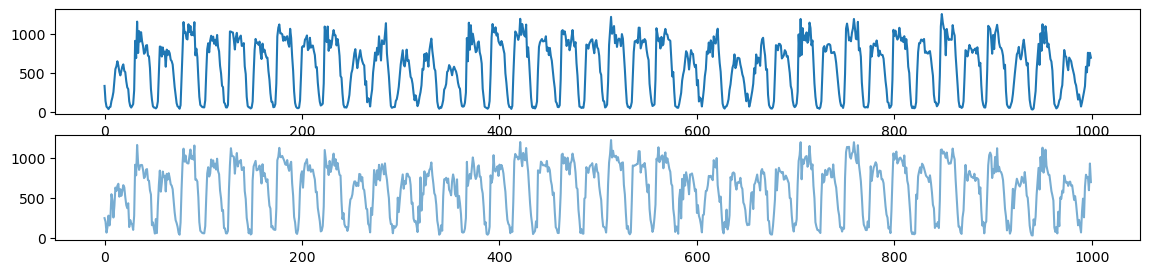

In [185]:
fig, ax =  plt.subplots(figsize=(14,3),ncols=1,nrows=2)
ax[0].plot(madrid[:1000])
ax[1].plot(madrid_knn_imputer[:1000], alpha=0.6)
plt.show()

##### 7.1.4 Заполнение на матричных преобразований

Используя документацию одного из методов восстановления третей группы ***табл. 7.1*** и проведите восстановление данных, сохранив результаты восстановления.

In [112]:
!pip install fancyimpute

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.8 MB 960.0 kB/s eta 0:00:14
   ---------------------------------------- 0.0/12.8 MB 960.0 kB/s eta 0:00:14
   ---------------------------------------- 0.1/12.8 MB 372.4 kB/s eta 0:00:35
   ---------------------------------------- 0.1/12.8 MB 381.3 kB/s eta 0:00:34
   ---------------------------------------- 0.1/12.8 MB 381.3 kB/s eta 0:00:34
   ---------------------------------------- 0.1/12.8 MB 381.3 kB/s eta 0:00:34
   ---------------------------------------- 0.1/12.8 MB 381.3 kB/s eta 0:00:34
   ---------------------------------------- 0.1/12.8 MB 381.3 kB/s eta 0:00:34
   ---------------------------------------- 0.1/12.8 MB 288.1 kB/s eta 0:00:45
   ------------

In [113]:
from fancyimpute import IterativeSVD

In [114]:
from sklearn.metrics import mean_squared_error

In [189]:
solver = IterativeSVD(rank=2)
madrid_iterative_svd = madrid_slice.copy()
madrid_iterative_svd = solver.fit_transform(madrid_iterative_svd)
madrid_iterative_svd = madrid_iterative_svd.ravel()

[IterativeSVD] Iter 1: observed MAE=344.506900
[IterativeSVD] Iter 2: observed MAE=268.333697
[IterativeSVD] Iter 3: observed MAE=258.855604
[IterativeSVD] Iter 4: observed MAE=256.405390
[IterativeSVD] Iter 5: observed MAE=255.762380
[IterativeSVD] Iter 6: observed MAE=255.618614
[IterativeSVD] Iter 7: observed MAE=255.591168
[IterativeSVD] Iter 8: observed MAE=255.591311
[IterativeSVD] Iter 9: observed MAE=255.597741
[IterativeSVD] Iter 10: observed MAE=255.602958


In [191]:
recovery['iterative_svd'] = madrid_iterative_svd

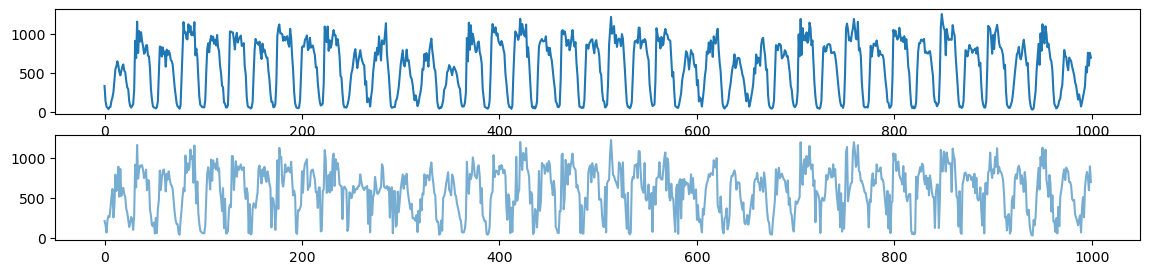

In [193]:
fig, ax =  plt.subplots(figsize=(14,3),ncols=1,nrows=2)
ax[0].plot(madrid[:1000])
ax[1].plot(madrid_iterative_svd[:1000], alpha=0.6)
plt.show()

##### 7.1.5 Сравнение результатов восстановления.

Для каждой группы методов постройте основные метрики оценки качества постановления.
На основе метрик отберите лучшие методы постановления метрик и выберите лучшую группу методов.
Для лучших методов из каждой группы постройте графики сравнения реальных и восстановленных данных. Объясните результаты и сделайте вывод.



In [195]:
metrics = {}

for method in recovery:
    metrics[method] = mean_squared_error(madrid, recovery[method])

metrics

{'mean': 44645.35770742836,
 'median': 44263.44668,
 'hot_deck': 24126.62272,
 'knn_imputer': 13215.6294052,
 'iterative_svd': 30748.613218905986}

*Вывод*: По результатам лучше всего справился knn. Благодаря своей способности учитывать локальную структуру, гибкости и устойчивости к выбросам. Хорошие результаты показали Hot-deck и svd.

#### **7.2 Нейросетевые методы востановления временного ряда**

##### *Краткое описание*

В данном пункте практической работы вам предстоит познакомиться с некоторыми нейросетевыми методами восстановления временных рядов.
Для выполнения данного пункта вам предстоит самостоятельно реализовать структуру нейросетевой, модели основанной на GRU нейронах и сравнить ее с другими нейросетевыми методами восстановления При сравнении с 3 группой из **табл.7. 2** вам необходимо выбрать **один** метод восстановления. Основные блоки обработки данных будут реализованы с использованием Pytorch. Вам не запрещается использовать для реализации Keras.

**табл. 7.2** - Нейросетевые методы восстановления.
№|Название группы|Модели и методы|
--|-------------|----|
1|Линейные нейроны|[Pytorch](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)|
 2eкрркуретные нейронны|[Pytorch](https://pytorch.org/docs/stable/generated/torch.nn.GRU.html)|
3|Сложные структуры|[SAITS, BRITS, M-RNN](https://github.com/WenjieDu/PyPOTS)|

In [1]:
recovery_nn = {}

##### 7.2.1 Загрузка и подготовка данных

In [3]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [5]:
path_data = Path('datasets')/'madrid.txt'
madrid = np.loadtxt(path_data)[:,:]
print(madrid.shape)

(25000, 10)


In [7]:
import copy
import random

random.seed(0)

def add_nan(x, percent = 0.25):
    x_with_nan = copy.deepcopy(x)
    nan_len = x.shape[0] * percent
    nan_counter = 0
    x_with_nan_index = []

    for i in range(x_with_nan.shape[0]):
        if nan_counter <= nan_len and random.randint(0, 1):
            x_with_nan[i] = np.nan
            nan_counter += 1

    return x_with_nan, np.isnan(x_with_nan)

In [9]:
madrid_with_nan, index = add_nan(madrid, 0.25)

In [11]:
madrid_with_nan.shape

(25000, 10)

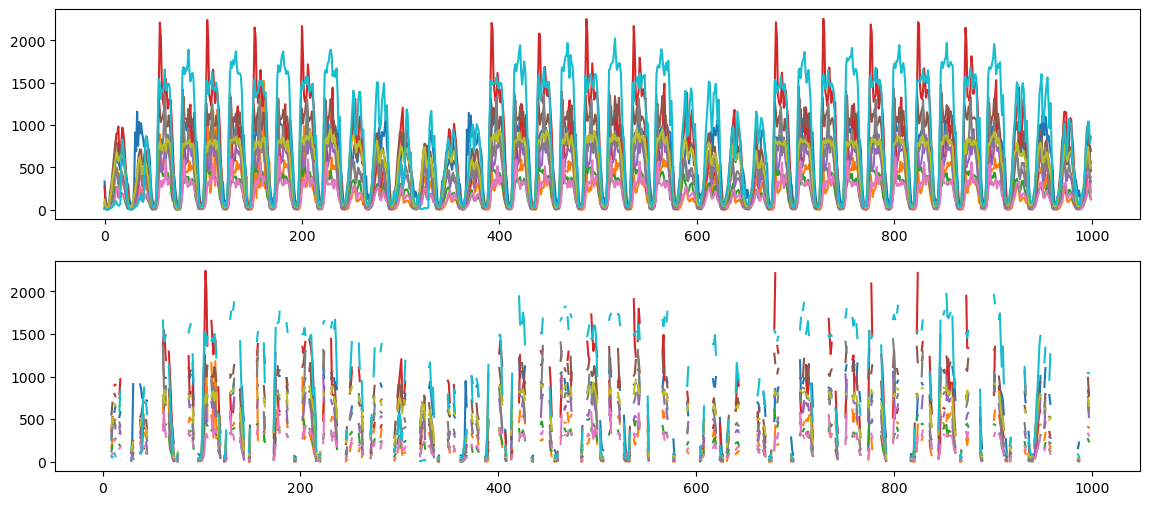

In [13]:
fig, ax =  plt.subplots(figsize=(14,6),ncols=1,nrows=2)
ax[0].plot(madrid[:1000])
ax[1].plot(madrid_with_nan[:1000])
plt.show()

In [15]:
def rolling_window(a, window, intersection=False):
    # result = torch.zeros(size=(a.shape[0],a.shape[1]))
    returns = []
    if intersection:  
        for i in range(0, a.shape[0]-window):
            returns.append(a[i:i + window])
    else:    
        for i in range(0, a.shape[0],window):
            returns.append(a[i:i + window])
    return np.stack(returns)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
madrid_normal_with_nan = scaler.fit_transform(madrid_with_nan)
rolling_madrid = rolling_window(madrid_normal_with_nan, 100, True)
train, test = train_test_split(rolling_madrid,shuffle=False, test_size=0.33)

##### 7.2.2 Базовая модель восстановления данных, построенная на нескольких слоях линейных нейронов.


Вам необходимо будет самостоятельно реализовать:
1. инициализацию nan значений какими либо другими значениями.
2. замер времени полного обучения и тестирования модели.

In [19]:
import torch
from torch import nn
from torch.utils.data import DataLoader

In [20]:
class LinearModel(nn.Module):
    def __init__(self, size_subsequent: int,dim = 1, nums_layers = 3, size_layers = 250):
        super().__init__()  
        
        self.size_subsequent = size_subsequent
        self.nums_layers = nums_layers*dim
        self.dim = dim
        self.size_layers = size_layers
        
        self.start_layers = nn.Sequential(nn.Flatten(),
                                          nn.Linear(size_subsequent*dim, self.size_layers),
                                          nn.LeakyReLU())
        self.model = nn.ModuleList([
                                        (nn.Sequential(
                                                nn.Linear(self.size_layers, self.size_layers), nn.LeakyReLU()
                                            ) 
                                        )
                                    for x in torch.arange(nums_layers)])
        self.model = nn.Sequential(*self.model)
        
        self.output = nn.Sequential(nn.Linear(self.size_layers,size_subsequent*dim),nn.Tanh())
        
    def forward(self, x):
        x = self.start_layers(x)
        
        x=self.model(x)
        x=self.output(x)
        return x.reshape(x.shape[0],self.size_subsequent,self.dim)

In [21]:
model = LinearModel(size_subsequent=train.shape[1],dim=train.shape[2])
optimizer = torch.optim.Adam(model.parameters(),lr=1.0e-3)
loss_func = nn.MSELoss()
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
batch_size = 64
percent = 0.25

train_loader = DataLoader(train,batch_size=batch_size,shuffle=True)
valid_loader = DataLoader(test,batch_size=batch_size,shuffle=True)

print(train.shape,test.shape)
epochs = 25

(16683, 100, 10) (8217, 100, 10)


In [22]:
model

LinearModel(
  (start_layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1000, out_features=250, bias=True)
    (2): LeakyReLU(negative_slope=0.01)
  )
  (model): Sequential(
    (0): Sequential(
      (0): Linear(in_features=250, out_features=250, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
    )
    (1): Sequential(
      (0): Linear(in_features=250, out_features=250, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
    )
    (2): Sequential(
      (0): Linear(in_features=250, out_features=250, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
    )
  )
  (output): Sequential(
    (0): Linear(in_features=250, out_features=1000, bias=True)
    (1): Tanh()
  )
)

In [27]:
import time
times_model = {}

In [29]:
model = model.to(device)
train_history = []
valid_history = []

start = time.time()
for epoch in range(epochs):
    train_loss = 0
    valid_loss = 0
    num_train_batches = 0
    num_valid_batches = 0

    # Training Phase
    model.train()  # Set the model to training mode
    for x in train_loader:
        if x.shape[0] != batch_size:
            continue  # Skip batches that don't match the expected batch size

        optimizer.zero_grad()
        x = x.to(device).to(torch.float32)
        test_index = torch.isnan(x)  # Directly create boolean mask on GPU
        X, nan = add_nan(x.clone(), percent)
        nan = nan.to(torch.bool)
        X[torch.isnan(X)] = 0.0
        
        recovery = model(X)
        loss_indices = nan & (~test_index)
        if loss_indices.any():  # Check if there are valid indices
            loss = loss_func(recovery[loss_indices], x[loss_indices])
            train_loss += loss.detach().cpu().item()
            loss.backward()
            optimizer.step()
            num_train_batches += 1

    if num_train_batches > 0:
        train_loss /= num_train_batches  # Average training loss

    # Validation Phase
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        for x in valid_loader:
            if x.shape[0] != batch_size:
                continue  # Skip batches that don't match the expected batch size

            x = x.to(device).to(torch.float32)
            test_index = torch.isnan(x)
            X, nan = add_nan(x.clone(), percent)
            nan = nan.to(torch.bool)
            X[torch.isnan(X)] = 0.0
            
            recovery = model(X)
            loss_indices = nan & (~test_index)
            if loss_indices.any():  # Check if there are valid indices
                loss = loss_func(recovery[loss_indices], x[loss_indices])
                valid_loss += loss.detach().cpu().item()
                num_valid_batches += 1

    if num_valid_batches > 0:
        valid_loss /= num_valid_batches  # Average validation loss

    train_history.append(train_loss)
    valid_history.append(valid_loss)
    print(f'Epoch: {epoch + 1}, Train Loss: {train_loss:.4f}, Valid Loss: {valid_loss:.4f}')

end = time.time()

Epoch: 1, Train Loss: 0.0336, Valid Loss: 0.0320
Epoch: 2, Train Loss: 0.0316, Valid Loss: 0.0326
Epoch: 3, Train Loss: 0.0316, Valid Loss: 0.0324
Epoch: 4, Train Loss: 0.0313, Valid Loss: 0.0317
Epoch: 5, Train Loss: 0.0313, Valid Loss: 0.0315
Epoch: 6, Train Loss: 0.0314, Valid Loss: 0.0316
Epoch: 7, Train Loss: 0.0314, Valid Loss: 0.0322
Epoch: 8, Train Loss: 0.0314, Valid Loss: 0.0321
Epoch: 9, Train Loss: 0.0312, Valid Loss: 0.0323
Epoch: 10, Train Loss: 0.0311, Valid Loss: 0.0320
Epoch: 11, Train Loss: 0.0311, Valid Loss: 0.0316
Epoch: 12, Train Loss: 0.0314, Valid Loss: 0.0322
Epoch: 13, Train Loss: 0.0313, Valid Loss: 0.0320
Epoch: 14, Train Loss: 0.0315, Valid Loss: 0.0327
Epoch: 15, Train Loss: 0.0319, Valid Loss: 0.0325
Epoch: 16, Train Loss: 0.0314, Valid Loss: 0.0334
Epoch: 17, Train Loss: 0.0314, Valid Loss: 0.0324
Epoch: 18, Train Loss: 0.0314, Valid Loss: 0.0315
Epoch: 19, Train Loss: 0.0318, Valid Loss: 0.0319
Epoch: 20, Train Loss: 0.0313, Valid Loss: 0.0325
Epoch: 21

In [31]:
times_model['linear']=end-start

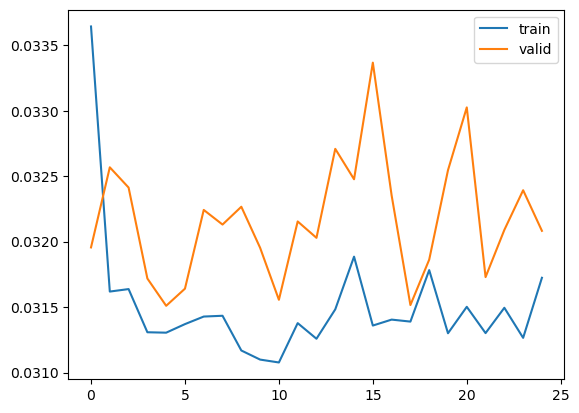

In [33]:
plt.plot(train_history,label='train')
plt.plot(valid_history,label='valid')
plt.legend()
plt.show()

In [37]:
test_rolling_madrid = rolling_window(madrid_normal_with_nan, 100, False)
#test = []
with torch.no_grad():
    for idx, batch in enumerate(test_rolling_madrid):
        batch = torch.Tensor(batch).to(device)
        nan = torch.isnan(batch)
        batch[nan]=0.0
        rec = model(batch[None,:])[0].cpu().numpy()
        nan = nan.cpu().numpy()
        test_rolling_madrid[idx][nan]=rec[nan]

In [39]:
test_madrid_normal = np.vstack(test_rolling_madrid)
test_linear = scaler.inverse_transform(test_madrid_normal)

In [41]:
recovery_nn['linear'] = test_linear

In [47]:
from sklearn.metrics import mean_squared_error

152236.36762394686


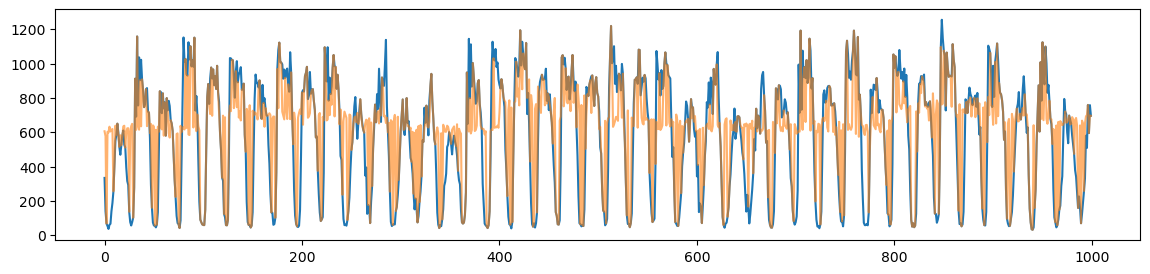

In [49]:
fig, ax =  plt.subplots(figsize=(14,3),ncols=1,nrows=1)

plt.plot(madrid[:1000,0])
plt.plot(test_linear[:1000,0],alpha=0.6)
print(mean_squared_error(madrid[index].reshape(1,-1),test_linear[index].reshape(1,-1)))

##### 7.2.3 Реккурентная модель востановлениях данных


In [53]:
class EncoderGRU(nn.Module):
    def __init__(self, size_subsequent: int, dim = 1, latten_size = 100, hidden_size=100):
        super().__init__()
        self.size_subsequent=size_subsequent
        self.dim = dim
        self.hidden_size = hidden_size
        self.gru = nn.GRU(input_size=dim,
                          hidden_size=self.hidden_size)
        
        self.latten = nn.Linear(hidden_size*size_subsequent,latten_size)
        self.leaky = nn.LeakyReLU()
        self.fl = nn.Flatten()
    def forward(self, x):
        x, _ = self.gru(x)
        x = self.leaky(x)
        #print(x.shape)
        x = self.fl(x)
        x = self.latten(x)
        return self.leaky(x)
        

In [54]:
class DecoderGRU(nn.Module):
    def __init__(self, size_subsequent: int, dim = 1, latten_size = 100, hidden_size=100):
        super().__init__()
        self.size_subsequent=size_subsequent
        self.dim = dim
        self.hidden_size = hidden_size
        self.latten_size=latten_size
        self.gru = nn.GRU(input_size=self.hidden_size,
                          hidden_size=dim)
        self.latten = nn.Linear(latten_size,hidden_size*size_subsequent)
        self.leaky = nn.LeakyReLU()
    
    def forward(self, x):
        x = self.latten(x)
        x = x.view(-1, self.size_subsequent, self.latten_size)
        x = self.leaky(x)
        x, _ = self.gru(x)
        return self.leaky(x)
        

In [55]:
class TimeAE(nn.Module):
    def __init__(self, size_subsequent: int, dim = 1, latten_size = 100, hidden_size=100):
        super().__init__()
        self.encoder = EncoderGRU(size_subsequent=size_subsequent,
                                 dim=dim,
                                 latten_size=latten_size,
                                 hidden_size=hidden_size) 
        self.decoder = DecoderGRU(size_subsequent=size_subsequent,
                                 dim=dim,
                                 latten_size=latten_size,
                                 hidden_size=hidden_size) 
    def forward(self, x):
        x=self.encoder(x)
        x = self.decoder(x)
        return x

In [56]:
model = TimeAE(size_subsequent=train.shape[1],dim=train.shape[2])
optimizer = torch.optim.Adam(model.parameters(),lr=1.0e-3)
loss_func = nn.MSELoss()
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
batch_size = 64
percent = 0.25

train_loader = DataLoader(train,batch_size=batch_size,shuffle=True)
valid_loader = DataLoader(test,batch_size=batch_size,shuffle=True)


epochs = 100

In [57]:
model

TimeAE(
  (encoder): EncoderGRU(
    (gru): GRU(10, 100)
    (latten): Linear(in_features=10000, out_features=100, bias=True)
    (leaky): LeakyReLU(negative_slope=0.01)
    (fl): Flatten(start_dim=1, end_dim=-1)
  )
  (decoder): DecoderGRU(
    (gru): GRU(100, 10)
    (latten): Linear(in_features=100, out_features=10000, bias=True)
    (leaky): LeakyReLU(negative_slope=0.01)
  )
)

In [59]:
model=model.to(device)
train_history = []
valid_history = []
start = time.time()
for epoch in np.arange(epochs):
    train_loss =0
    valid_loss =0

    for i, x in enumerate(train_loader):
        if x.shape[0]==batch_size:
            optimizer.zero_grad()
            x = x.to(device).to(torch.float32)
            test_index = np.isnan(x.cpu().numpy())
            X = x.clone()
            X, nan = add_nan(X,percent)
            #
            
            recovery = model(X)
            loss = loss_func(recovery[(nan)&(~test_index)],x[(nan)&(~test_index)])
            train_loss += loss.detach().cpu().item()
            loss.backward()
            optimizer.step()
    train_loss/=(i+1)
    with torch.no_grad():
        for i, x in enumerate(valid_loader):
            if x.shape[0]==batch_size:
                x = x.to(device).to(torch.float32)
                test_index = np.isnan(x.cpu().numpy())
                X = x.clone()
                X, nan = add_nan(X,percent)
                # 
                
                recovery = model(X)
                loss = loss_func(recovery[(nan)&(~test_index)],x[(nan)&(~test_index)])
                valid_loss += loss.detach().cpu().item()
    valid_loss/=(i+1)
    train_history.append(train_loss)
    valid_history.append(valid_loss)
    print(f'epoch:{epoch+1} train:{train_loss}, valid:{valid_loss}')
end = time.time()

epoch:1 train:0.005667857565271215, valid:0.0048371934866200585
epoch:2 train:0.00420799586293912, valid:0.004097167624507186
epoch:3 train:0.0035405969621891947, valid:0.003608167110112055
epoch:4 train:0.003133067681893021, valid:0.0032865865636154895
epoch:5 train:0.002844720459775107, valid:0.0030663977774192195
epoch:6 train:0.0026280734780819025, valid:0.0028908427194656097
epoch:7 train:0.0024395643169652687, valid:0.002762273224720428
epoch:8 train:0.002310831576114756, valid:0.002648445248762651
epoch:9 train:0.0021598582576168165, valid:0.002507162047550082
epoch:10 train:0.0020520448929119955, valid:0.002424571598165257
epoch:11 train:0.0019568192395221055, valid:0.002385350184284093
epoch:12 train:0.0018743742489295216, valid:0.0022636219126338413
epoch:13 train:0.0018025992480124493, valid:0.0022381309459577926
epoch:14 train:0.001751357673888605, valid:0.002197221281591716
epoch:15 train:0.0016929136809511146, valid:0.002117336496653021
epoch:16 train:0.001646642735534815

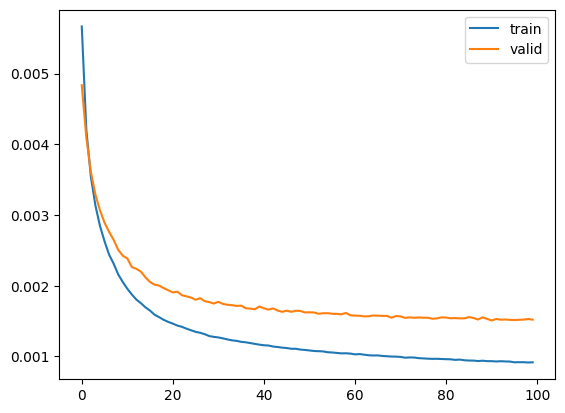

In [60]:
plt.plot(train_history,label='train')
plt.plot(valid_history,label='valid')
plt.legend()
plt.show()

In [62]:
times_model['ae']=end-start

In [63]:
test_rolling_madrid = rolling_window(madrid_normal_with_nan, 100, False)
#test = []
with torch.no_grad():
    for idx, batch in enumerate(test_rolling_madrid):
        batch = torch.Tensor(batch).to(device)
        nan = torch.isnan(batch)
        #
        
        rec = model(batch[None,:])[0].cpu().numpy()
        nan = nan.cpu().numpy()
        test_rolling_madrid[idx][nan]=rec[nan]

In [64]:
test_madrid_normal = np.vstack(test_rolling_madrid)
test_ae = scaler.inverse_transform(test_madrid_normal)

In [65]:
recovery_nn['test_ae'] = test_ae

7815.347353696892


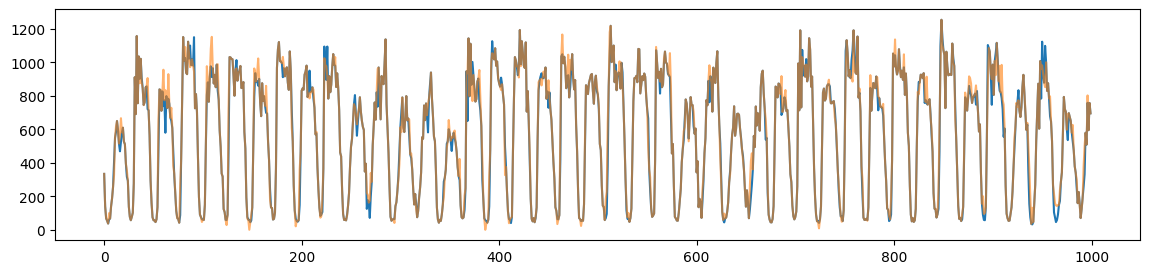

In [66]:
fig, ax =  plt.subplots(figsize=(14,3),ncols=1,nrows=1)

plt.plot(madrid[:1000,0])
plt.plot(test_ae[:1000,0],alpha=0.6)
print(mean_squared_error(madrid[index].reshape(1,-1),test_ae[index].reshape(1,-1)))

##### 7.2.4 Сложные модели нейросетевого восстановления данных


Вам необходимо выбрать одну модель из 3 группы таблицы 7.2 и используя документацию произвести восстановления того же ряда. Произведите замер времени.

In [ ]:
!pip install pypots==0.0.9

In [67]:
from pypots.imputation import SAITS


In [68]:
model= SAITS(n_features=madrid.shape[1],
             n_steps=100,
             device=device,
             d_k=64,
             d_v=64,
             d_model=128,
             d_inner=128,
             n_head=4,
             n_layers=2,
             dropout=0.05,
             epochs=100)

Model initialized successfully. Number of the trainable parameters: 667608


In [ ]:
start = time.time()
model.fit(train,test)
end = time.time()
times_model['saits']=end-start

epoch 0: training loss 0.1332, validating loss 0.0487
epoch 1: training loss 0.0748, validating loss 0.0418


In [124]:
test_rolling_madrid = rolling_window(madrid_normal_with_nan, 100, False)
test_rolling_madrid = model.impute(test_rolling_madrid)


In [125]:
test_madrid_normal = np.vstack(test_rolling_madrid)
test_saits = scaler.inverse_transform(test_madrid_normal)

In [130]:
recovery_nn['saits'] = test_saits

4653.035675034267


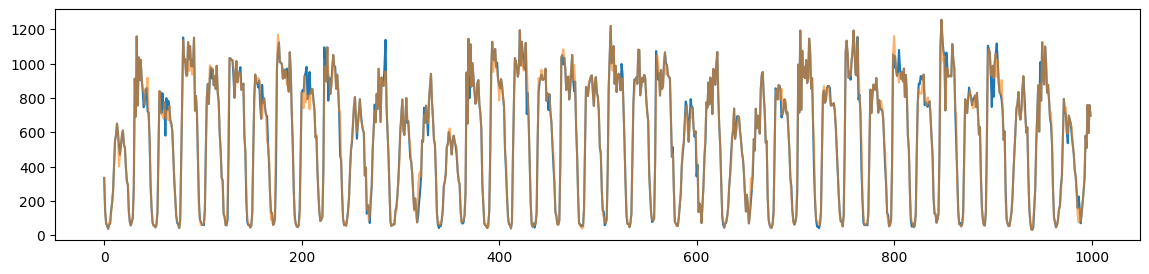

In [126]:
fig, ax =  plt.subplots(figsize=(14,3),ncols=1,nrows=1)

plt.plot(madrid[:1000,0])
plt.plot(test_saits[:1000,0],alpha=0.6)
print(mean_squared_error(madrid[index].reshape(1,-1),test_saits[index].reshape(1,-1)))

##### 7.2.5 Сравнения результатов.
Также, как и в пункте 7.1.5 постройте графики сравнения моделей. Дополнительно постройте графики сравнения времени. Сделайте выводы

#### **7.3 Прогноз временного ряда**

##### *Краткое описание*

Используя модель и [ARIMA](реализация) произвидите прогноз ряда на следующие колличество точек: 1, 5, 10.
Сравните результаты. Постройте графики прогноза и точности прогноза.